In [1]:
import matplotlib
import matplotlib.gridspec as gridspec
%matplotlib inline
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.animation as animation
from IPython.display import HTML

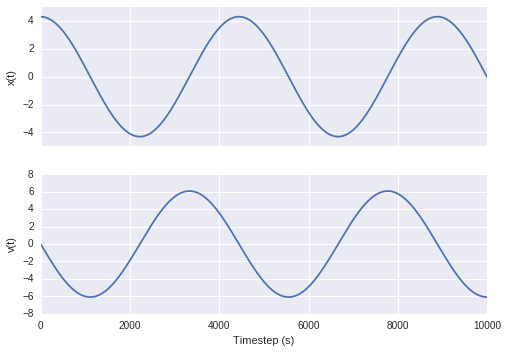

In [2]:
# Euler integration of harmonic oscillator V(x) = x^2 with mass = 1
n_iter = 10000 # number of iterations
dt = 0.001 # step size
x = 4.3 # our starting position x(0)

# first we need to calculate the v(0+1/2t) term
v_old = -x*dt

# save these for plotting
trajectory = []
velocities = []

# do the iterations
for i in range(n_iter):
    
    v_next = v_old - 2*x*dt
    x_next = x + v_next*dt

    trajectory.append(x_next)
    velocities.append(0.5*(v_next + v_old))
    
    x = x_next # new becomes old
    v_old = v_next
    
fig, ax = sns.plt.subplots(2, sharex=True)
ax[0].plot(trajectory)
ax[0].set_ylabel('x(t)')
ax[1].plot(velocities)
ax[1].set_xlabel('Timestep (s)')
ax[1].set_ylabel('v(t)')

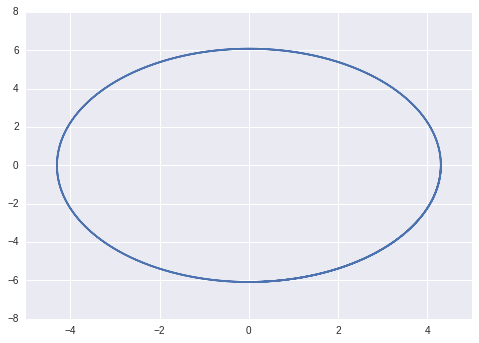

In [ ]:
sns.plt.plot(trajectory, velocities)

Animating in browser...


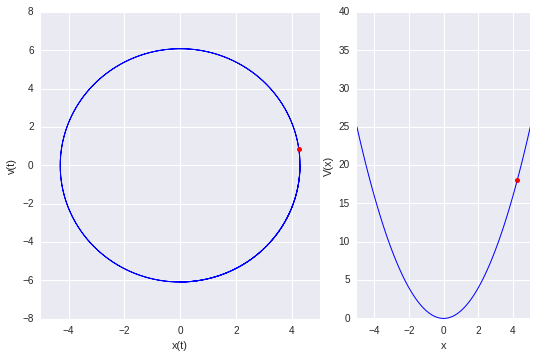

In [ ]:
trajectory = np.array(trajectory)[::10]
velocities = np.array(velocities)[::10]

def parabola(x):
    return x**2
x = np.linspace(-5, 5, 100)
y = parabola(x)


fig = sns.plt.figure()

gs2 = gridspec.GridSpec(1, 5)
gs2.update(left=0.1, right=0.95, hspace=0.25, wspace=0.55)
ax_ps = sns.plt.subplot(gs2[:, :-2])
ax_fn = sns.plt.subplot(gs2[:, -2:])

line_fn, = ax_fn.plot(x, y, lw=1, alpha=1.0, color='b')
line_ps, = ax_ps.plot(trajectory, velocities, lw=1, alpha=1.0, color='b')
spot_fn, = ax_fn.plot([], [], color='r', marker='o', markersize=5, linestyle='')
spot_ps, = ax_ps.plot([], [], color='r', marker='o', markersize=5, linestyle='')

ax_fn.set_xlim(-5, 5)
ax_fn.set_ylim(-0.05, 40)
ax_ps.set_xlim(-5, 5)
ax_ps.set_ylim(-8, 8)

ax_fn.set_xlabel('x')
ax_fn.set_ylabel('V(x)')
ax_ps.set_xlabel('x(t)')
ax_ps.set_ylabel('v(t)')


# initialization function: plot the background of each frame
def init():
    spot_fn.set_data([], [])
    spot_ps.set_data([], [])
    return [line_fn, line_ps, line_fn, spot_ps]

# animation function.  This is called sequentially
def animate(t):
    spot_ps.set_data( [trajectory[t]], [velocities[t]] )
    spot_fn.set_data( [trajectory[t], parabola(trajectory[t])] )
    return [spot_ps, spot_fn]

# call the animator. 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                               frames=435, 
                               interval=10, blit=True)

mywriter = animation.FFMpegWriter(fps=100, extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
anim.save('./harmonic_oscillator_ps.mp4', writer=mywriter)
anim.save('./harmonic_oscillator_ps.gif', dpi=72, writer='imagemagick')
print 'Animating in browser...'
HTML(anim.to_html5_video())